<a href="https://colab.research.google.com/github/cSimancasc/ApuntesTF/blob/main/FundamentosTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arquitectura básica de tensores usando tensorflow**

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.18.0


##**Acceso GPUs**

El uso de CO nos permite compilar el código no necesariamente en la CPU de nuestro ordenador. El comando tf.config.list_physical_Devices() no permite mostrar aquerllos dispositivos en donde el código va a ser compilado, así como ver si lo hace desde alguno de ellos(en caso negativo nos devolverá una lista vacía). Si deseamos explotar al máximo CO podemos acudir a la esquina superior derecha  y cambiar el tipo de entorno de ejecución.

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Es importante señalar que al cambiar el entorno de ejecución el documento se resetea compleatmente por lo que abrá que re-compilarlo. Las características técnicas de la GPU se muestran a continuación.

In [ ]:
!nvidia-smi

Tue Jul 22 14:47:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P0             26W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **Introducción a los tensores-Generación/Dimensión**




*   Tensores de elementos constantes
*   Tensores de elementos variables
*   Tensores aleatorios
*   Tensores mezclados






Comenzamos creando tensores a partir del comando tf.constant(más simple que almacena constantes numéricas en cierta estructuras). El funcionamiento es equivalnete al trabajo con arrays en la librería numpy.


In [ ]:
scalar=tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

Donde la primera parte del comando especifica la forma, la segunda el tipo de datos y la tercera el número de elementos. El comando .ndim nos permite obtener la dimensión de los elementos

In [ ]:
scalar.ndim

0

In [ ]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
vector.ndim

1

In [ ]:
matrix=tf.constant([[10,7],[7,10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
matrix_1=tf.constant([[10.,7.],[3.,2.],[8.,0.]],dtype=tf.float16)
matrix_1

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  0.]], dtype=float16)>

El datatype va correlacionado con el almacenamiento y procesamiento de las valores numéricos en el ordenador, haciéndolo una herramienta útil al poder sacrificar precisión por rendimiento al trabajar con mayor cantidad de datos

In [ ]:
matrix_1.ndim

2

Un tensor propiamente dicho como el que se muestra a continuación es una relación n-dimensional de datos en este caso, trabajamos con escalares(dim=0), vectores(dim=1) y matrices(dim=2).

*Intuyo que en lo referente a tensorflow y como trata los datos, porque matemáticamente un vector no es necesariamente un elemento algebraico 1-dimensional o una matriz bi-dimensional. Son elementos de un espacio vectorial cuya dimensión en todo caso depende del mismo y con que elementos estamos operando.
De alguna forma se entiendo por dimensión al rango del mismo, es decir, el número de dimensiones (ejes) que contiene.*



In [ ]:
tensor=tf.constant([[[1,2,3],[4,5,6]],
                   [[7,8,9],[10,11,12]],
                   [[13,14,15],[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

A diferencia de tf.constant, el comando tf.variable nos permite crear tensores cuyos valores pueden cambiar

In [ ]:
tensor_variable=tf.Variable([10,7])
tensor_constante=tf.constant([10,7])
tensor_variable,tensor_constante

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

En este caso los tensores variables no se comportan como los arrays de la libreria numpy y se deben cambiar a partir de comando tensor(posición).assign(valor)

In [ ]:
tensor_variable[0]=7
tensor_variable

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
tensor_variable[0].assign(7)
tensor_variable

Como podemos intuir un tensor de valores constantes permanecerá inalterable independientemente de que empleemos el comando

In [ ]:
tensor_constante[0].assign(7)

El comando tf.random.normal(shape=()), crea un tensor aleatorio a partir de los valores de una distribución normal y la semilla previamente especificada

In [ ]:
random_1=tf.random.Generator.from_seed(42)
random_1=random_1.normal(shape=(3,2))
random_2=tf.random.Generator.from_seed(42)
random_2=random_2.normal(shape=(3,2))

random_1,random_2,random_1==random_2

Mientras la semilla sea equivalente, los valores de dos o más tensores aletorios lo serán debido a que estos se generan de manera semi-aleatorio. Si buscamos un conjunto de tensores aleatorios y distintos deberemos especificar una semilla de partida distinta para cada caso específico

In [ ]:
random_3=tf.random.Generator.from_seed(7)
random_3=random_3.normal(shape=(3,2))
random_2,random_3,random_2==random_3

De forma equivalente podemos mezclar de forma aleatoria los elementos de un tensor empleando el comando random.shuffle que mezcla una de las dimensiones del vector.

In [ ]:
no_mezclado=tf.constant([[10,7],[3,4],[2,5]])
tf.random.shuffle(no_mezclado)


Si buscamos que los tensores mezclados conserven el mismo orden deberemos emplear una semilla aleatoria tanto a nivel operacional(dentro del comando) como global(determinada al principio del código de ejecución).

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(no_mezclado, seed=42)

##**Arrays, Conversión y Procesamiento de vectores**


*   Conversión de arrays a tensores
*   Extraer información
*   Indexar
*   Expandir
*   Conversor de tensores a arrays
*   One-hot Encoding




Podemos generar tensores nulos y unidad de la forma deseada a partir de los siguientes comandos.

In [ ]:
tf.ones([10,7])

In [ ]:
tf.zeros(shape=(3,4))

En la práctica es cómodo convertir arrays de Numpy en tensores. La diferencia principal es que los tensores pueden ser compilados en un GPU(unidad de procesamiento gráfico) de modo que se realicen cálculos numéricos complejos de forma eficiente

In [ ]:
import numpy as np

numpy_A=np.arange(1,25,dtype=np.int32)
numpy_A

In [ ]:
A=tf.constant(numpy_A)
A

Una vez convertido en tensores podemos modificare su estructura siempre y cuando el número de elementos del mismo se conserve

In [ ]:
B=tf.constant(numpy_A,shape=(2,3,4))
B

In [ ]:
C=tf.constant(numpy_A,shape=(4,9))
C


Comenzamos creando un vector de rango cuatro. Como se puede observar tendremos un tensor formado por dos estructuras quye a su vez se componen cada una de tres matrices 4*5. La dimensión del mismo será de dim=4 dado que el número dado que es el número máximo de dimensiones linealmente independientes(filas) de cada elemento del mismo.

In [ ]:
tensor_rango4=tf.zeros(shape=[2,3,4,5,])
tensor_rango4

In [ ]:
tensor_rango4.shape,tensor_rango4.ndim,tf.size(tensor_rango4)

Obtenemos a continuación un conjunto de datos prácticos acerca de nuetro tensor.
* Tipo de datos de cada elemento
* Dimensión-Rango
* Forma:Nos indica cuál es la estructura del tensor.
* shape[i]: Nos da información acerca de la estructura de una de las dimensiones
* Número de elementos



In [ ]:
print("Tipo de dato de cada elemento=>", tensor_rango4.dtype)
print("Número de dimensiones(rango)=>", tensor_rango4.ndim)
print("Forma del tensor=>",tensor_rango4.shape)
print("Elementos del primer eje=>",tensor_rango4.shape[0])
print("Elementos del último eje=>",tensor_rango4.shape[-1])
print("Número total de elementos=>",tf.size(tensor_rango4))

Los tensores puden ser indexados como las listas de python, pongamos que buscamos los dos primeros elementos de cada dimensión.

In [ ]:
tensor_rango4[:2,:2,:2,:2]

Buscamos elementos de forma más selectiva, por ejemplo quitando una de las dimensiones, basta con no acompañarlos de ningún número en el comando de indexado en forma de lista.

In [ ]:
tensor_rango4[:1,:,:1,:1]

In [ ]:
tensor_rango4[:3,:1,:,:1]

Buscamos por último expandir las dimensiones de nuestro tensor proceso que podemos efectuar de dos formas distintas. En la primera de ellas tomamos un tensor de dimensión menor y añadimos la dimensión especificando el eje a partir de tf.newaxis.

In [ ]:
tensor_rango2=tf.zeros(shape=(2,2))
tensor_rango3_ejemplo1=tensor_rango2[...,tf.newaxis]
tensor_rango2,tensor_rango3_ejemplo1

De forma equivalente una segunda forma de hacerlo sería emplear el comando tf.expand_dims(tensor que buscamos expandir, eje que queremos expandir)

In [ ]:
tf.expand_dims(tensor_rango2,axis=-1)

Si buscamos convertir por ejemplo un tensor en array podemos hacerlo de forma indisytinta como se muestra a continuación.

In [ ]:
K=tf.constant(np.array([3.,7.,10.]))
K,np.array(K),K.numpy()

A la hora de construir nuestro código e implementar ambos de forma simultánea es relevante tener en cuenta el tipo de dato por defecto de ambos, la contrucción de arrays numpy trabajo con float64 mientras que los tensores por defecto operan en float32.

In [ ]:
numpy_K=tf.constant(np.array([3.,7.,10.]))
tensor_K=tf.constant([3.,7.,10.])
numpy_K.dtype,tensor_K.dtype

La programación en caliente toma una lista o vector 1-Dimensional  y lo transforma en un tensor donde los valores no nulos vienen especificados como índices por la lista o vector de entrada. Emplearemos el comando tf.one_hot(lista,profundidad=escalar que define la dim)

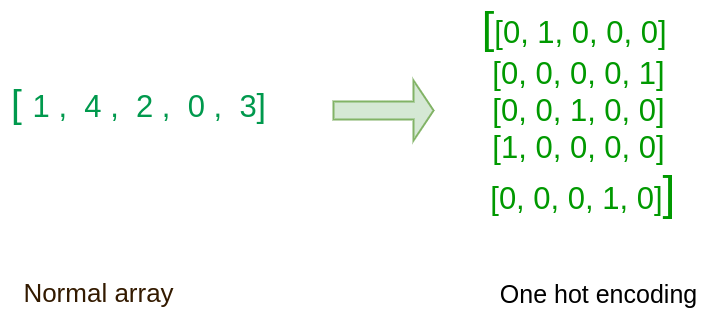

In [ ]:
lista=[0,1,2,3]
tf.one_hot(lista,depth=4)

De forma equivalente tambien puede especificarse el tipo de dato o eje, así como los valores que deseamos que sean indexados y no indexados.

In [ ]:
tf.one_hot(lista,depth=4,on_value="valores indexados",off_value="valores no indexados")

Completamos nuestro estudio de las operaciones básicas con las potencias,raices y logaritmos. Al trabajar con operaciones más complejas como estass dós últimas debemos ser muy conscientes del tipo de datos del tensor de entrada y en consecuencia convertirlo dado que los comando trabajan con float de preicisión variable.

In [ ]:
J=tf.range(1,10)
J

In [ ]:
tf.square(J)

In [ ]:
tf.sqrt(tf.cast(J,dtype=tf.float32))

In [ ]:
tf.math.log(tf.cast(J,dtype=tf.float32))

##**Operaciones básicas con tensores**


*   Operaciones básicas
  *   Suma/Resta
  *   Producto
      * tf.multiply
      * tf.matmul
      * tf.tensordot
*   Re-dimensionalización
*   Transposición



Podemos implementar las operaciones básicas de forma intuítiva como sigue

In [ ]:
tensor=tf.constant([[10,7],[3,4]])
tensor+10


In [ ]:
tensor*10

In [ ]:
tensor-10

En la práctica si queremos aprovechar las ventajas que nos ofrece TF será conveniente realizar dichas operaciones a partir de los comandos propios que este nos ofrece a continuación se muestra una multipliación.
*Esto será clave cuando tratemos con gran volumen de datos y busquemos compilar en GPU*

In [ ]:
tf.multiply(tensor,10)

Las operaciones con matrices o tensores siguen las reglas usuales y pueden realizarse empleando la libreria numpy en python o con el comando propio de TF tf.marmul(tensor_i,tensor_j). Como ya discutimos en la sección anterior la principal ventaja de emplear los módulos propios de TF radica en su compilación cuando contemos con gran cantidad de datos en las unidades de procesamiento gráfico.

In [ ]:
print(tensor)
tf.matmul(tensor, tensor)

In [ ]:
import numpy as np
np.dot(tensor,tensor)

Otra forma de realizar el producto de matrices es como un producto de tensores a partir del comando tf.tensordot(tensor,tensor,eje=i) en donde es necesario especificar el eje sobre el cuál queremos realizar la multiplicación.

In [ ]:
tf.tensordot(tensor, tensor,axes=1)

Alguna de las operaciones complementario que podemos realizar son la re-dimensionalización y la transposición que cambian la estructura del tensor. En la primera específicamos la forma deseada mientras la segunda se limita a transponerlo

In [ ]:
tensor_10=tf.constant([[1,2],[3,4],[5,6]])
tf.reshape(tensor_10,(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
tf.transpose(tensor_10)

##**Transformaciones y Operaciones estadísticas sobre tensores**
*   Cambiar el tipo de datos
*   Agregación
    *   Valor absoluto
    *   Min/Max/Media-tf.reduce
*   Operaciones estadísticas-tf.stats
    *   varianza
    *   desviación estandar
*   Min/Max-tf.argmax/tf.argmin
*   "Aplastar" tensores

A priori la forma en la que creamos el tensor y los datos que ingresamos predeterminan el tipo de datos del mismo.

In [ ]:
B=tf.constant([1.7,7.4])
C=tf.constant([7,10])
B.dtype,C.dtype

El tipo de dato determina la precisión del modelo. Lo óptimo es combinar 16-bit y 32_bit en punto flotante de modo que el modelo entrene rápido y de forma eficiente pero manteniendo la estabilidad numérica junto con la precisión.
Los modelos actuales usando float32 de forma predeterminada, sin embargo existen float16 y bfloat16 que consumen menos memoria y runeran más rápido.
Teniendo todo esto en cuenta el dattype puede cambiarse a conveniencia a partir del siguiente comando.

In [ ]:
D=tf.cast(B,dtype=tf.float16)
E=tf.cast(C,dtype=tf.float32)

D.dtype,E.dtype

Por agregación entendomos la condensación de varios valores del interior de un tensor en un conjunto más reducido de los mismos. Comenzamos calculando el valor absoluto del mismo a partir del comando tf.abs(tensor).

In [ ]:
F=tf.constant([-7,-10])
F,tf.abs(F)

Si queremos buscar el mínimo o máximo del mismo recurriremos a los comando tf.reduce_min(tensor) y tf.reduce_max(tesnor). Nótese que a diferencia de la librería numpy en python(np.min/np.max) los comandos llevan la palabra reduce delante.

In [ ]:
G=tf.constant(np.random.randint(0,100,size=50))
G,tf.reduce_min(G),tf.reduce_max(G)

De forma equivalente podemos calcular la media y suma del mismo.

In [ ]:
tf.reduce_mean(G),tf.reduce_sum(G)

En la práctica es útil recurrir a los comandos propios de estasdística a la hora de preestudiar las entradas y salidas de datos en nuestro conjunto, comenzamos calculando la varianza y la desviación estandar a partir de tfp.stats.variance(tensor)-tfp.stats.stddev(tensor)

In [ ]:
import tensorflow_probability as tfp
G.dtype
tfp.stats.variance(G),tfp.stats.stddev(G)

In [ ]:
tfp.stats.variance(tf.cast(G,dtype=tf.float64)),tfp.stats.stddev(tf.cast(G,dtype=tf.float64))

La maroyia de comando propios del módulo de estadística requieren que el tensor de entrada sea un valor real o complejo, de modo que debemos convertir los mismos a un float de la precisión que queramos. A su vez ambas podría haber sido calculadas a partir del módulo tf.math en donde de nuevo hay que tener en cuenta dicho defecto.

In [ ]:
tf.math.reduce_variance(G),tf.math.reduce_std(G)

In [ ]:
tf.math.reduce_variance(tf.cast(G,dtype=tf.float32)),tf.math.reduce_std(tf.cast(G,dtype=tf.float32))

Para un vector formado por un gran número de elementos puede sernos útil también encontrar el valor máximo/mínimo e indexear donde se encuentra. Para ello recurriremos a los comandos tf.argmax(tensor)/tf.argmin(tensor) e indexearemos como comúnmente haríamos en numpy

In [ ]:
tf.random.set_seed(42)
H=tf.random.uniform(shape=[50])
H

In [ ]:
tf.argmax(H),H[tf.argmax(H)]

In [ ]:
tf.argmin(H),H[tf.argmin(H)]

Dónde es sencillo verificar que son equivalentes a los encontrados empleando tf.reduce.

In [ ]:
tf.reduce_max(H)==H[tf.argmax(H)],tf.reduce_min(H)==H[tf.argmin(H)]

Consiste en reducir las dimensiones de un tensor, es útil cuando este tiene muchas dimensiones singulares aisladas y se realiza a partir del comando tf.squeeze

In [ ]:
tf.random.set_seed(42)
I=tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
I

In [ ]:
I_aplastado=tf.squeeze(I)
I_aplastado